In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
# You can also import other things ...
# YOUR CODE HERE (OPTION)

from sklearn.compose import ColumnTransformer


from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

# Khám phá dữ liệu và chuẩn bị dữ liệu

In [2]:
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [4]:
num_rows,num_cols=df.shape
print('Dữ liệu bao gồm: {} dòng và {} cột'.format(num_rows,num_cols))

Dữ liệu bao gồm: 569 dòng và 33 cột


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Mỗi dòng dữ liệu thể hiện những chỉ số bệnh ung thư vú của bệnh nhân đã mắc bệnh

## Dữ liệu có các dòng bị lặp không? 

In [5]:
have_duplicated_rows=df.duplicated().any()
print(have_duplicated_rows)

False


## Mỗi cột có ý nghĩa gì?

-  ID number: ID của ca bệnh
-  Diagnosis: kết quả chẩn đoán (M = malignant (cấp tính), B = benign(giai đoạn đầu)):
-  radius: bán kính 
-  perimeter: chu vi = radius*2*pi
-  area: diện tích = (radius)^2 * pi
-  texture là độ lệch chuẩn của giá trị gray-scale
-  smoothness local variation trong độ dài bán kính
-  compactness được tính bằng công thức compactness = (perimeter^2 / area) - 1.0
-  concavity: mức độ nghiêm trọng của các phần lõm của đường viền
-  concave points số phần lõm của đường viền
-  symmetry: đối xứng
-  fractal dimension: số chiều của fractal = coastline approximation - 1
- Các giá trị mean, standard error, worst được tính toán trên mỗi hình ảnh và mỗi giá trị tương ứng với các field trên ảnh:
  + _mean giá trị trung bình của 3 giá trị
  + _se(standard error) là độ lỗi chuẩn của biến 
  + _worst

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [6]:
col_dtypes=df.dtypes
print(col_dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

- Ta thấy hầu hết các features có kiểu dữ liệu là float64 ngoại trừ id có kiểu int và diagnosis có kiểu object
- Hàm open_object_type dùng để xem bên trong cột có dữ liệu là object thì dữ liệu kiểu dữ lện bên trong mỗi phần tử của nó là gì

In [7]:
def open_object_dtype(s):
    df=pd.Series(s)
    a=df.apply(lambda x : type(x)).unique()
    dtypes = set(a)
    return dtypes

In [8]:
objects_key=(df.loc[:, df.dtypes == object]).keys()
print("numer of object columns:",len(objects_key))
for key in objects_key:
    print("types of ",key," is ",open_object_dtype(df[key]))

numer of object columns: 1
types of  diagnosis  is  {<class 'str'>}


In [9]:
print(df.diagnosis.unique())

['M' 'B']


- Ở đây ta thấy mỗi diagnosis là có kiểu dữ liệu là object và bên trong nó chứa các string
- Ta in ra thì thấy chỉ có 2 giá trị là M và B như là các string
- Do đó ta sẽ chuyển dữ liệu của cột về dạng string

In [10]:
df = df.astype({"diagnosis":'string'})

In [11]:
df.diagnosis.dtype

StringDtype

In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

In [13]:
numeric_cols=list(set(df.keys()))
numeric_cols.remove('diagnosis')
nume_col_profiles_df=pd.DataFrame(index=['missing_ratio','min','max'],columns=numeric_cols)
nume_col_profiles_df.loc['missing_ratio',numeric_cols]=np.float64(df[numeric_cols].isna().mean()*100)

nume_col_profiles_df.loc['min',numeric_cols]=np.float64(df[numeric_cols].min())

nume_col_profiles_df.loc['max',numeric_cols]=np.float64(df[numeric_cols].max())

nume_col_profiles_df=nume_col_profiles_df.astype(np.float64)
print(nume_col_profiles_df)

               area_se           id  compactness_worst  perimeter_mean  \
missing_ratio    0.000          0.0            0.00000            0.00   
min              6.802       8670.0            0.02729           43.79   
max            542.200  911320502.0            1.05800          188.50   

               concavity_mean  Unnamed: 32  fractal_dimension_mean  \
missing_ratio          0.0000        100.0                 0.00000   
min                    0.0000          NaN                 0.04996   
max                    0.4268          NaN                 0.09744   

               symmetry_se  concavity_worst  smoothness_se  ...  radius_worst  \
missing_ratio     0.000000            0.000       0.000000  ...          0.00   
min               0.007882            0.000       0.001713  ...          7.93   
max               0.078950            1.252       0.031130  ...         36.04   

               perimeter_se  perimeter_worst  smoothness_worst  \
missing_ratio         0.000    

- Có thể thấy hầu như các giá trị đều bình thường không bị thiếu giá trị từ cột Unnamed: 32 với tỉ lệ thiếu giá trị là 100% chúng ta sẽ loại bỏ cột này

## Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

In [14]:
def missing_ratio(s):
    return s.isna().mean() * 100
def num_diff_vals(s):
    return s.dropna().nunique()

def diff_vals(s):
    return s.dropna().unique()

In [15]:
cate_cols=['id','diagnosis']

index=['missing_ratio', 'num_diff_vals', 'diff_vals']
cate_col_profiles_df=pd.DataFrame(
     index=index,
     columns=cate_cols)
cate_col_profiles_df = df[cate_cols].agg([missing_ratio,num_diff_vals,diff_vals])

print(cate_col_profiles_df)

                                                              id diagnosis
missing_ratio                                                0.0       0.0
num_diff_vals                                                569         2
diff_vals      [842302, 842517, 84300903, 84348301, 84358402,...    [M, B]


- 2 cột categorical cũng không có gì bất thường
- Nhưng để dùng cho vẽ biểu đồ hay nhận xét thì ta sẽ loại bỏ cột id vì không cần thiết

## Tiền xử lí dữ liệu

### Loại bỏ 2 cột id và Unnamed 32:

In [16]:
list_drop=['id','Unnamed: 32']
df=df.drop(list_drop,axis=1)

In [17]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Phân bố của biến diagnosis

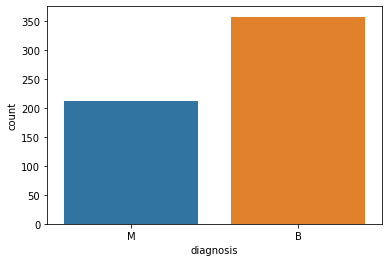

In [18]:
ax = sns.countplot(x="diagnosis", data=df)

- Ta có thể thấy số bệnh nhân được chẩn đoán là ung thư giai đoạn đầu(B) chiếm nhiều hơn với hơn khoảng 150 so với số bệnh nhân được chẩn đoán là ung thu mãn tính (M)

- Drop cột diagnosis ra để vẽ heatmap sau đó quan sát và tìm các features có độ tương quan cao

<AxesSubplot:>

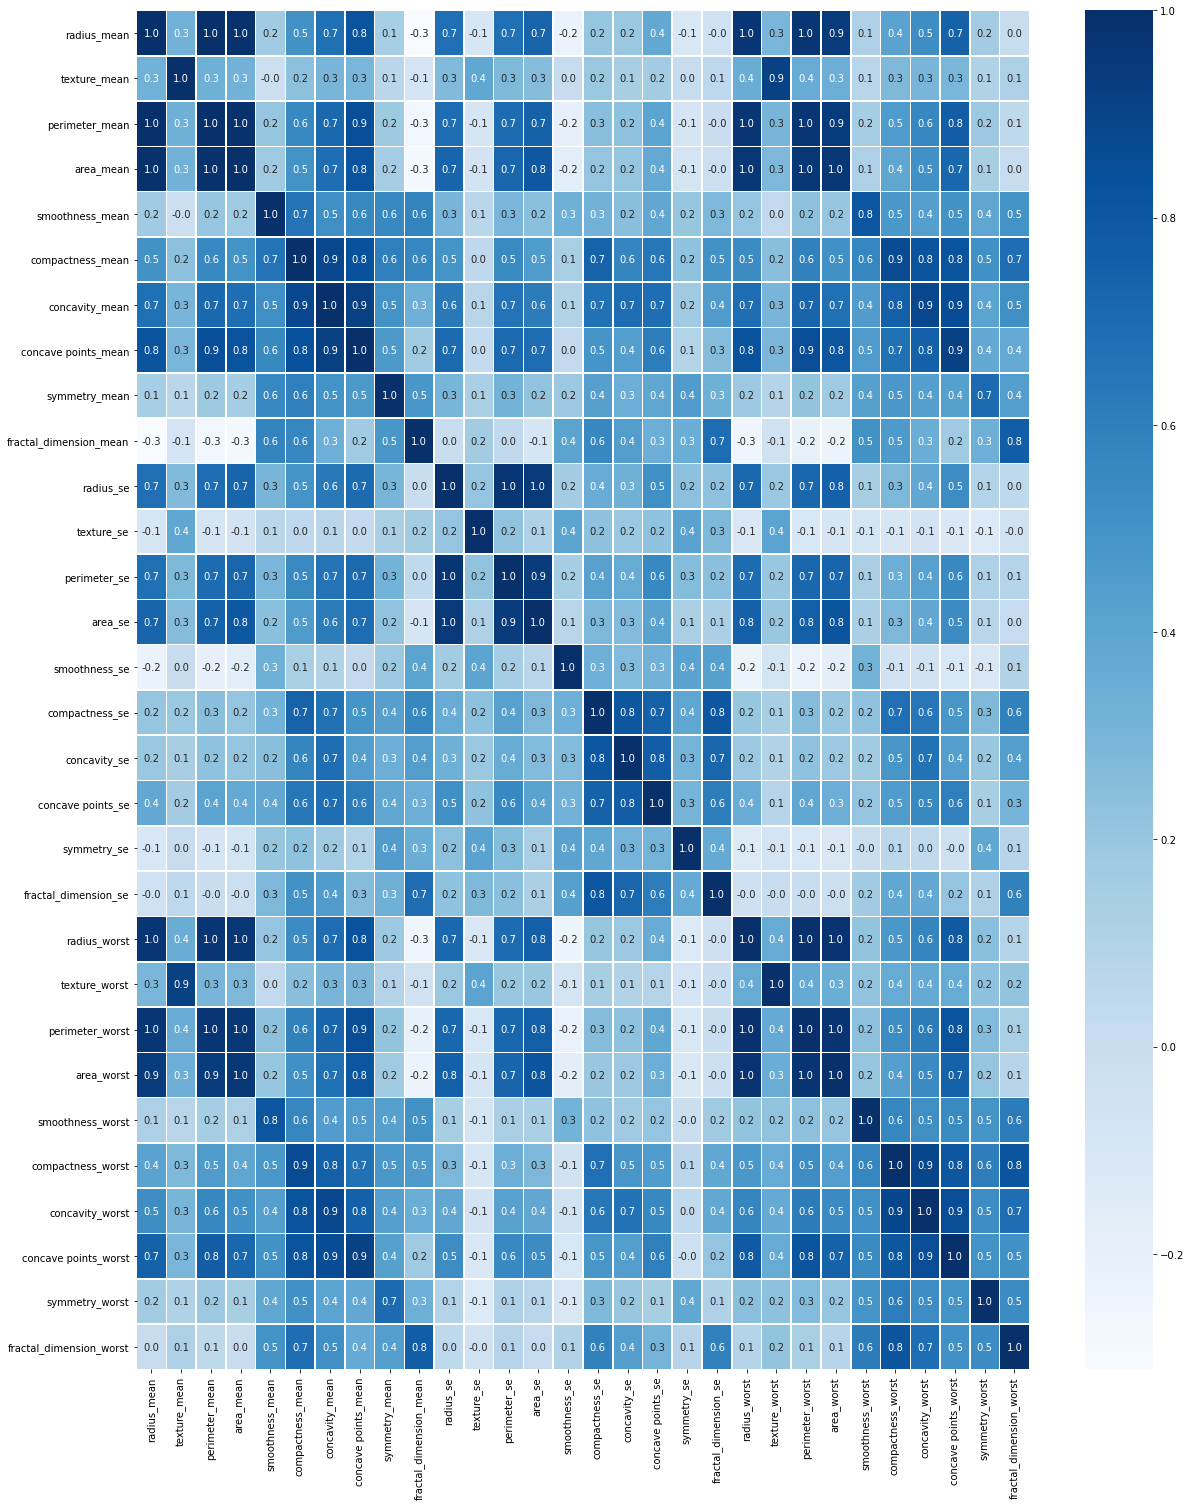

In [19]:
heat_map=df
heat_map=heat_map.drop('diagnosis',axis=1)
f,ax = plt.subplots(figsize=(20,25))
sns.heatmap(heat_map.corr(), annot=True, linewidths=.6, fmt= '.1f',ax=ax,cmap="Blues")

In [20]:
df.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Chọn lọc các feature phù hợp với mô hình dựa trên correlation matrix

- Dựa trên correlation matrix ta thử chọn ra 3 thuộc tính có độ tương quan cao(>0.9) với nhau là radius_mean, perimeter và area_mean 

In [21]:
feature_select=heat_map

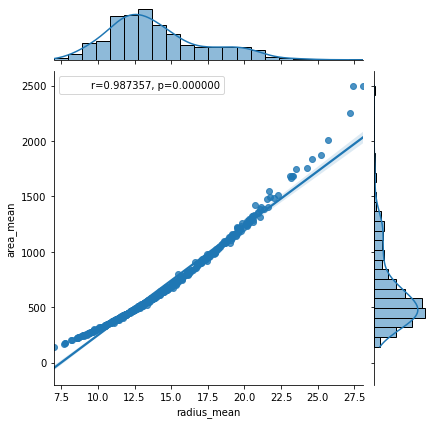

In [22]:
graph = sns.jointplot(x="radius_mean", y="area_mean", data=feature_select, kind="reg")

r, p = stats.pearsonr(x=feature_select['radius_mean'], y=feature_select['area_mean'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

rcParams['figure.figsize'] = 20,15

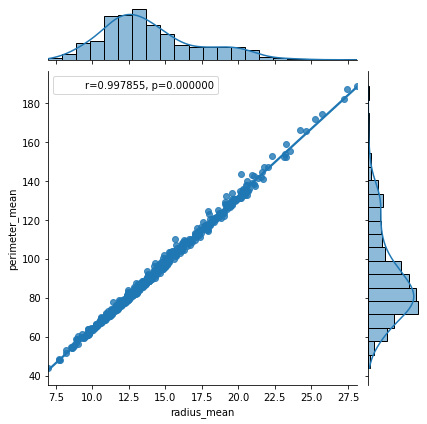

In [23]:
graph = sns.jointplot(x="radius_mean", y="perimeter_mean", data=feature_select, kind="reg")

r, p = stats.pearsonr(x=feature_select['radius_mean'], y=feature_select['perimeter_mean'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])


- Ta có thể thấy quá rõ ràng 2 thuộc tính này phụ thuộc lẫn nhau nghĩa là khi thuộc tính này tăng thì thuộc tính kia tăng với độ  tương quan là 0.987
- Tương tự peimeter cũng có sự phụ thuộc với thuộc tính radius_mean 
- Như vậy với 3 thuộc tính phụ thuộc lẫn nhau ta phải quyết định chỉ giữ lại một thuộc tính vì khi những thuộc tính phụ thuộc lẫn nhau mà để vào mô hình thì:
   + Mô hình có thể bị quá chú tâm vào những thuộc tính phụ thuộc đó nếu chúng có giá trị lớn dẫn đến bỏ qua những sự quan trọng của các thuộc tính khác
   + Việc đưa những thuộc tính phụ thuộc vào dẫn đến việc dư thừa thuộc tính dẫn đến mô hình tính toán lâu hơn
- Tuy nhiên làm sao để chọn 1 trong 3 thuộc tính thì ở đây ta có thể đoán được rằng chu vi và diện tích của hình tròn được tính dựa trên bán kính
  + area= radius^2 * pi
  + perimeter= radius*2*pi
  + cùng thử tính với một 
- Như vậy các thuộc tính liên quan đến perimeter và area sẽ bị xóa:
  + area_mean
  + area_se
  + area_worst
  + perimeter_mean
  + perimeter_se
  + perimeter_worst

In [24]:
drop_ar_per=['perimeter_mean','area_mean','area_se',
    'perimeter_se','area_worst','perimeter_worst','area_worst']

In [25]:
feature_select=feature_select.drop(drop_ar_per,axis=1)

#### Tiếp tục tìm kiếm những thuộc tính có độ correlation hơn 0.9 khi đã loại bỏ area và perimeter

In [26]:
list_key=feature_select.keys()
list_high_corr=[]
for i in range(0,len(list_key)-1):
    for j in range(1,len(list_key)):
        r, p = stats.pearsonr(x=feature_select[list_key[i]], y=feature_select[list_key[j]])
        if(r>0.8 and r<0.9999999):
            temp_list=[list_key[i],list_key[j],r]
            list_high_corr.append(temp_list)

In [27]:
list_high_corr
df_high_corr = pd.DataFrame(list_high_corr, columns =['feature1', 'feature2','r'])
df_high_corr=df_high_corr.sort_values(by=['r'], ascending=False).reset_index()
df_high_corr=df_high_corr.drop("index",axis=1)
df_high_corr.head(60)

,feature1,feature2,r
0,radius_mean,radius_worst,0.969539
1,concavity_mean,concave points_mean,0.921391
2,concave points_mean,concavity_mean,0.921391
3,texture_worst,texture_mean,0.912045
4,texture_mean,texture_worst,0.912045
5,concave points_worst,concave points_mean,0.910155
6,concave points_mean,concave points_worst,0.910155
7,compactness_worst,concavity_worst,0.892261
8,concavity_worst,compactness_worst,0.892261
9,concavity_worst,concavity_mean,0.884103


- Ta có thể thấy convavity, concave points,compactness cũng có sự tương quan rất lớn với nhau độ tương quan lớn hơn 0.8
- Thử vẽ ra concave points_worst và concavity_worst với độ tương quan >0.85

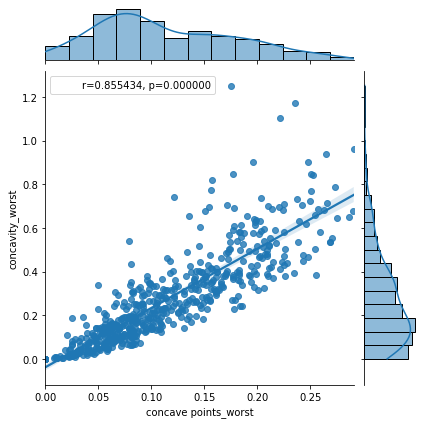

In [28]:
graph = sns.jointplot(x="concave points_worst", y="concavity_worst", data=feature_select, kind="reg")

r, p = stats.pearsonr(x=feature_select['concave points_worst'], y=feature_select['concavity_worst'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])


- Rõ ràng ta vẫn có thể nhìn thấy rõ được sự phụ thuộc của 2 thuộc tính concave points_worst và concavity_worst
- Khi concave points_worst tăng thì concavity_worst cùng tăng
- Khi vẽ những biểu đồ liên quan trong 3 thuộc tính concavity, concave points,compactness thì cũng sẽ nhận thấy sự tương tự và bây giờ chúng ta sẽ đưa ra quyết định chọn 1 trong 3 để giữ lại
  + Loại bỏ compactness trước vì compactness = (perimeter^2 / area - 1.0), perimeter và area có thể được tính bằng radius
  + Loại bỏ concave points vì concavity là độ tập trung của các điểm cong trên viền nó đã thể hiện luôn phần nào vễ những điểm cong là concave points. Bên cạnh đó khi ta tìm trên bảng các thuộc tính có độ tương quan lớn hơn 0.8 có thể thấy radius và concave points có sự tương quan với nhau với 0.83. Một phần là vì khi bỏ thuộc tính này vào thì làm giảm độ chính xác của mô hình
- Như vậy ta sẽ giữ lại các thuộc tính liên quan đến concavity và loại bỏ compactness và concave points
  + compactness_mean
  + concave points_mean
  + compactness_worst
  + concave points_worst
  + compactness_se
  + concave points_se

- Cuối cùng ta sẽ không loại bỏ các giá trị mean, se, worst mặc dù chúng có độ tương quan cao giữa các tập giá trị 
- Như vậy các thuộc tính được giữ lại bao gồm:
  + radius
  + texture
  + smoothness
  + concavity
  + symmetry
  + fractal_dimension

In [29]:
drop_conPoint_compact = ['concave points_mean','concave points_se','concave points_worst',
    'compactness_worst','compactness_mean',
    'compactness_se']

# Updated scaled features dataset
features_scaled=df
feature_select = feature_select.drop(drop_conPoint_compact,axis = 1)

In [30]:
num_rows,num_cols=feature_select.shape
print('Dữ liệu sau khi tiền xử lí bao gồm: {} dòng và {} cột'.format(num_rows,num_cols))

Dữ liệu sau khi tiền xử lí bao gồm: 569 dòng và 18 cột


# Mô hình học máy

In [31]:
y_sr = df["diagnosis"]
X_df = feature_select


- Tiến hành tách tập dữ liệu ra thành tập train và tập validation
  + Tập train chứa 60% 
  + Tập Valid chứa 40%

In [32]:
# Tách tập huấn luyện và tập validation theo tỉ lệ 60%:40%
train_X_df, val_X_df, train_y_sr, val_y_sr = \
                              train_test_split(X_df, y_sr, 
                                               test_size=0.4, 
                                               stratify=y_sr, 
                                               random_state=35)

### Xử lí các giá trị bị thiếu 

In [33]:
numeric_features = train_X_df.keys()
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy='mean'))]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ],remainder="passthrough"
)


### Chuẩn hóa dữ liệu: 
- Dùng để cân bằng giá trị dữ liệu giữa câc cột giúp mô hình không quá tập trung vào một cột dữ liệu nào đó có giá trị quá lớn so với những cột còn lại

### Mô hình Multi-layer Perceptron Classifier
   - Là một mô hình học có giám sát sử dụng thuật toán Backpropagation để huấn luyện tập dữ liệu
   - Với các thuộc tính của dữ liệu X và dữ liệu target y mô hình sẽ ước lượng và cho ra kết quả
   - Nó khác biệt với logistic regression là có thể sử dụng một hoặc nhiều layer gọi là hidden-layer
   - Các parameter:
      + hidden_layer_size=50: số neuron trong mỗi hidden-layer
      + activation=relu: function dùng để kích hoạt hidden-layer
      + solver=lbfgs: giải pháp cho việc tối ưu hóa các trọng số
      + alpha: L2 pennalty, chỉ số alpha sẽ được thay đổi liên tục trong suốt quá trình huấn luyện để tìm được mô hình có độ chính xác cao nhất
      + random_sate=0: số lần random cho các trọng số 
      + max_iter=10000: số lần lặp tối đa 

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(50),activation='relu', solver='lbfgs', alpha=1, 
                    random_state=0, max_iter=10000)

### Sử dụng Pipeline để kết hợp việc chuẩn hóa và mô hình
   - Các giá trị alpha sẽ bao gồm [0,0.01,0.1, 1,5, 10,20,30,40,50] thay đổi qua các lần lặp
   - Sử dụng pipeline để fit với tập train
   - Sau đó tính toán độ chính xác trên tập train và tập valid rồi lưu vào từng list tương ứng
   - Tính thêm độ lỗi của mỗi mô hình với biến alpha khác nhau bằng cách sử dụng hàm cross_val_score với số lần lặp là 10 cho mỗi lần tính. Độ lỗi tính xong sẽ được lưu vào biến list error_rate kết quả này sẽ hổ trợ ta chọn ra mô hình tốt hơn nếu các giá trị alpha cùng cho ra độ chính xác trên tập valid là như nhau

In [35]:
full_pipeline=Pipeline(steps=[("preprocessor",preprocessor),("scal", StandardScaler()),("mlp",mlp)])
train_accs = []
val_accs = []
alphas = [0,0.01,0.1, 1,5, 10,20,30,40,50]
error_rate = []
best_val_acc = 0
best_alpha = None
for alpha in alphas:
        full_pipeline.set_params(mlp__alpha=alpha)
        full_pipeline.fit(train_X_df,train_y_sr)
        train_acc=np.sum(np.equal(train_y_sr, full_pipeline.predict(train_X_df))*100 / len(train_y_sr))
        val_acc=np.sum(np.equal(val_y_sr, full_pipeline.predict(val_X_df))*100 / len(val_y_sr))
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        scores = cross_val_score(mlp, train_X_df,train_y_sr, cv=10, scoring='accuracy')
        error_rate.append(1 - scores.mean())
        if val_acc> best_val_acc:
            best_alpha=alpha
            best_val_acc=val_acc

### Trực quan hóa độ chính xác của mô hình qua các giá trị alpha

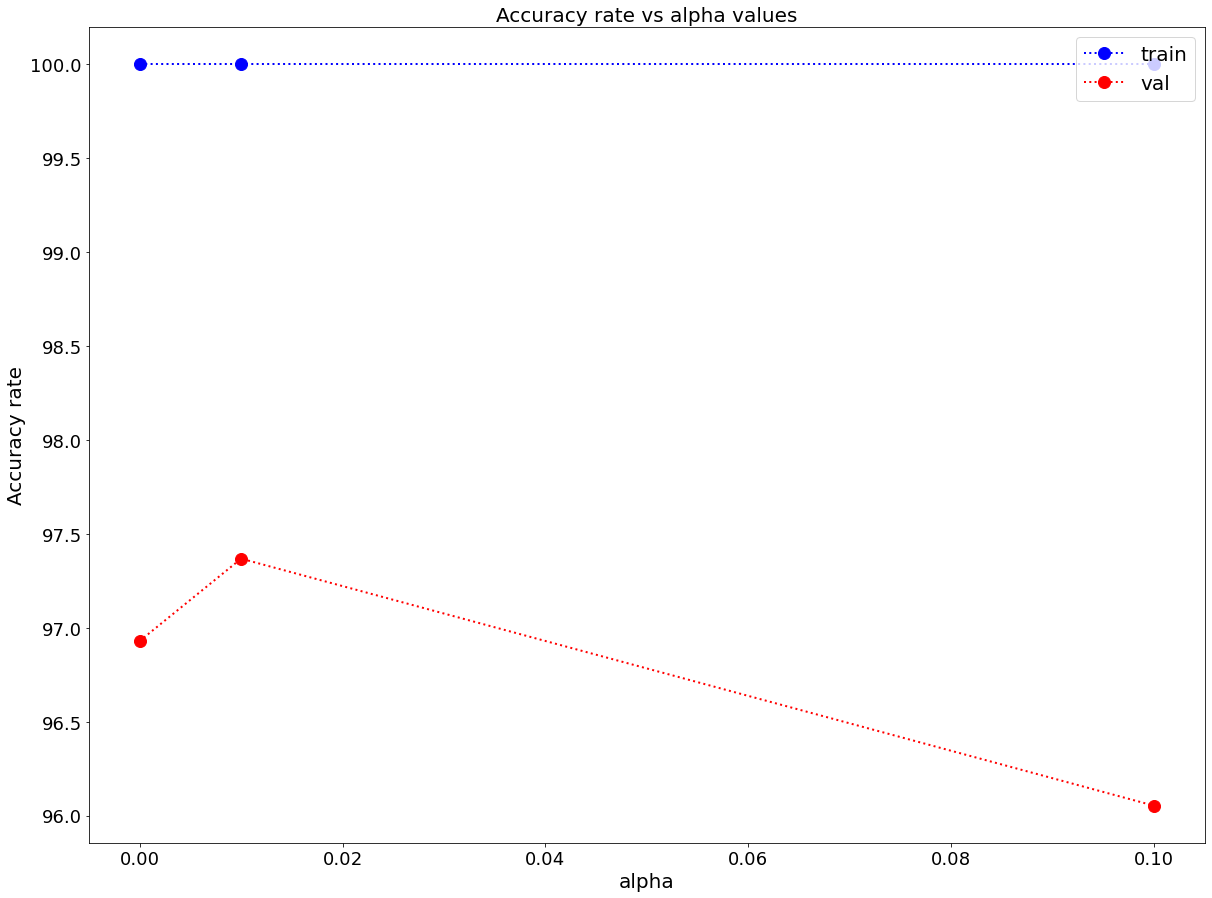

In [36]:
x = [0,0.01,0.1]
y1 = train_accs[:3:]
y2 = val_accs[:3:]
plt.plot(x, y1, "-b", label="train",linestyle='dotted',marker='o',linewidth=2, markersize=12)
plt.plot(x, y2, "-r", label="val",linestyle='dotted',marker='o',linewidth=2, markersize=12)
plt.legend(loc="upper right",fontsize=20)
plt.xlabel('alpha', fontsize=20)
plt.ylabel('Accuracy rate', fontsize=20)
plt.tick_params(labelsize=18)
plt.rcParams["figure.figsize"] = (30,15)
plt.title('Accuracy rate vs alpha values',fontsize=20)
plt.show()

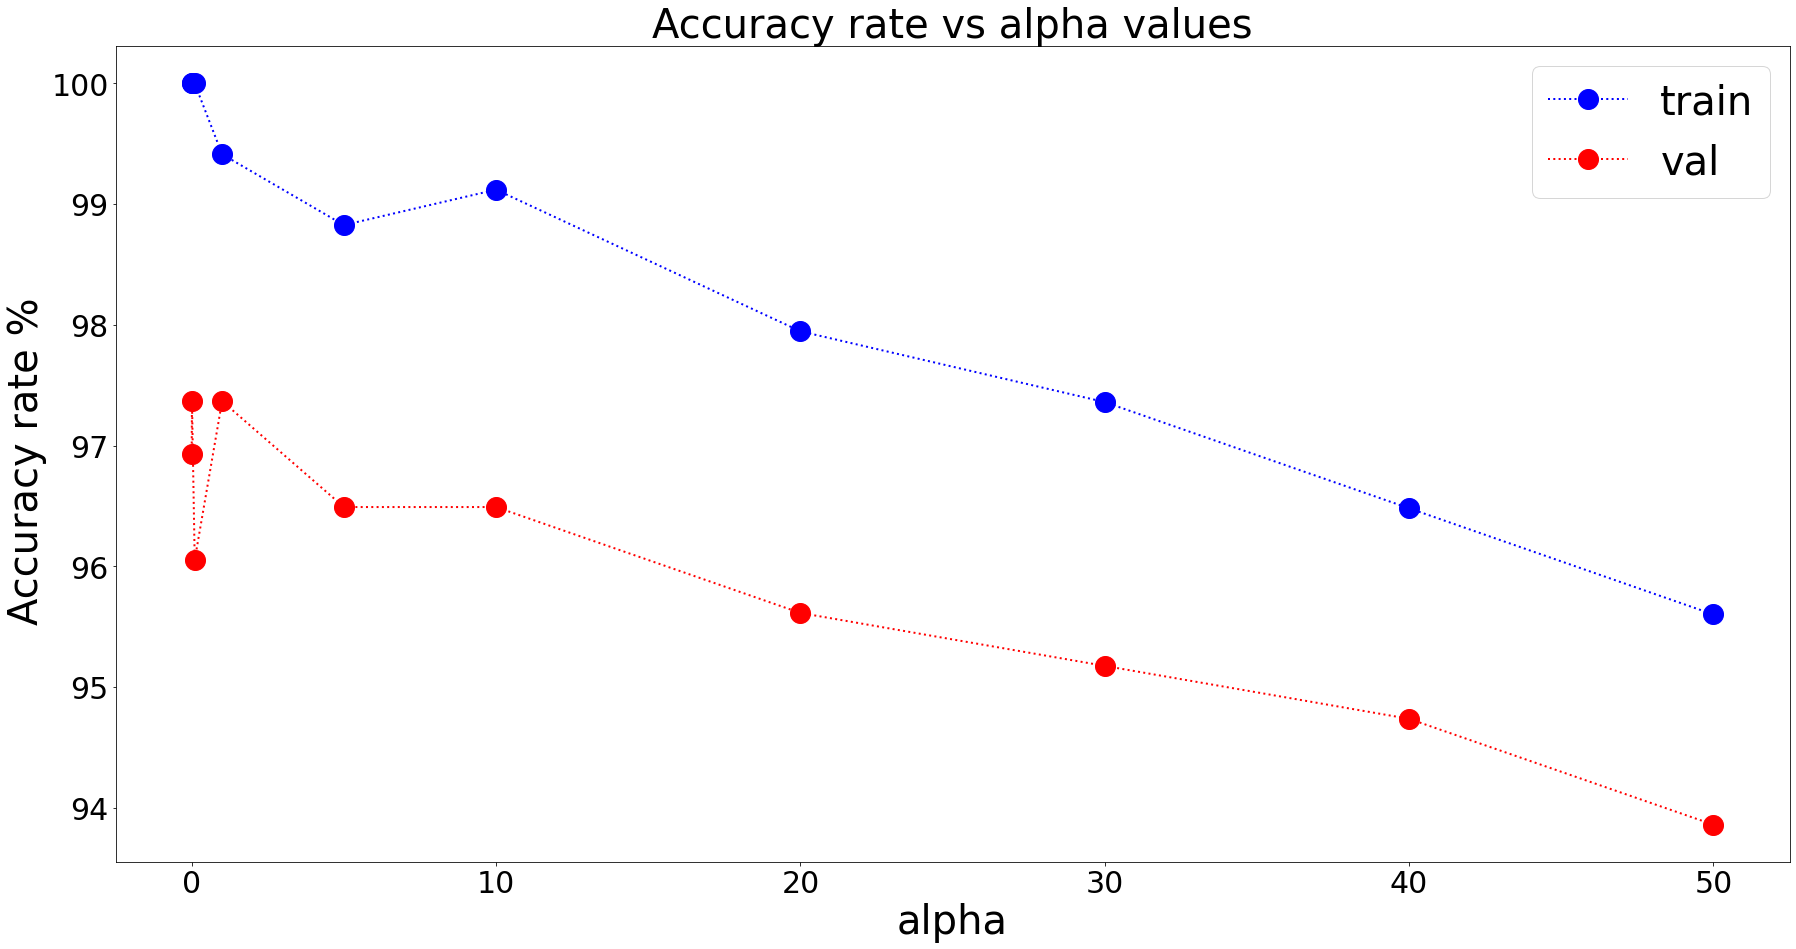

In [37]:
x = alphas
y1 = train_accs
y2 = val_accs
plt.plot(x, y1, "-b", label="train",linestyle='dotted',marker='o',linewidth=2, markersize=20)
plt.plot(x, y2, "-r", label="val",linestyle='dotted',marker='o',linewidth=2, markersize=20)
plt.legend(loc="upper right",fontsize=40)
plt.xlabel('alpha', fontsize=40)
plt.ylabel("Accuracy rate % " , fontsize=40)
plt.tick_params(labelsize=30)
plt.title('Accuracy rate vs alpha values',fontsize=40)
plt.show()

- Ở tập train ta thấy gần như tỉ lệ chính xác của mô hình sẽ giảm dần khi alpha tăng lên. Vì khi tăng alpha sẽ giúp điều chỉnh độ phân tán của dữ liệu hay nói cách khác là làm giảm việc overfitting của dữ liệu do đó alpha thấp thì ở tập huấn luận mô hình gần như khớp với dữ liệu của tập huấn luyện nên cho kết quả 100% và khi alpha càng cao thì số điểm trên tập huấn luyện cũng càng giảm
- Ở tập validation khi tăng alpha thì số điểm của mô hình trên tập validation sẽ tăng và ngược lại. Vì như đã nói ở trên thì khi tăng alpha sẽ làm giảm việc mô hình bị overfitting nên sẽ làm cho số điểm của mô hình trên tâp validation ngày càng tăng.Tuy nhiênsố điểm của mô hình tăng đến ngưỡng trong trường hợp này là alpha=1 thì giảm khi lên 100 nghĩa là nếu tăng quá cao thì số điểm sẽ giảm xuống. Điều này là do nếu tăng alpha quá cao thì sẽ dẫn đến việc mô hình bị bias, việc giữa alpha ở mức ổn định không quá cao cũng không quá thấp sẽ giúp mô hình tránh bị overfitting hoặc underfitting 
- Kết quả cho thấy giá trị alpha tốt nhất là 0.01 và 1 với độ chính xác hơn 97%. Theo lý thuyết ta sẽ chọn alpha=1 vì nó sẽ giúp giảm overfitting trên mô hình nhưng để đảm bảo an toàn ta sẽ tiếp xem về độ lỗi khi alpha thay đổi

### Trực quan hóa độ lỗi của mô hình qua các giá trị alpha

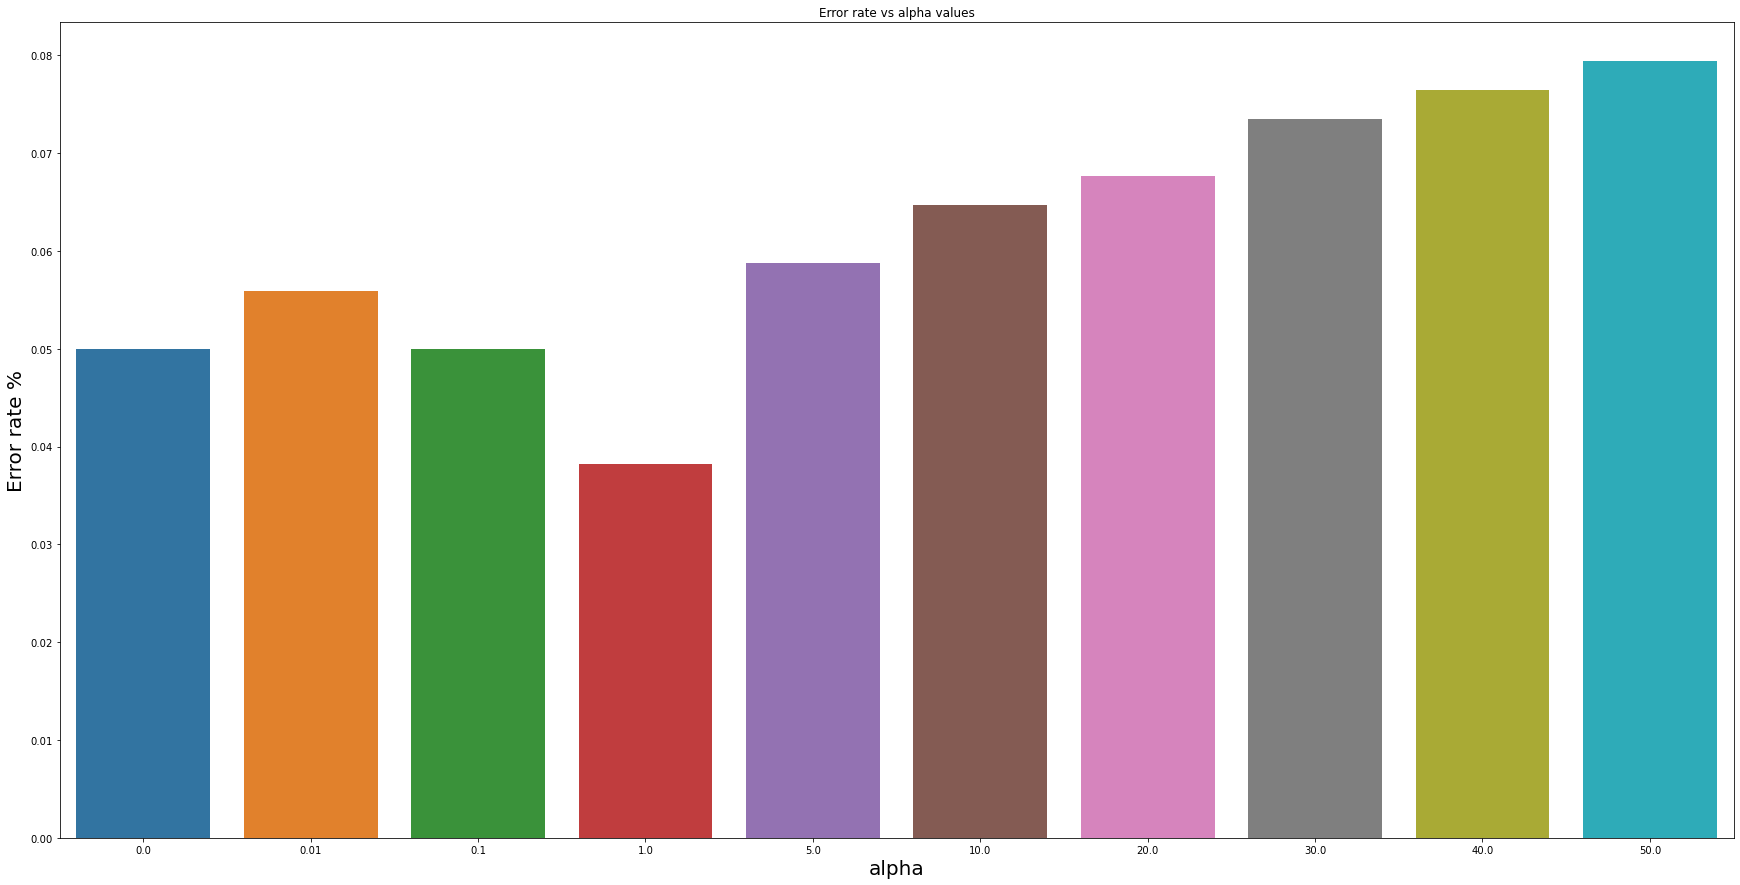

In [38]:
ax = sns.barplot(alphas,error_rate)
plt.xlabel('alpha', fontsize=20)
plt.ylabel('Error rate %', fontsize=20)
plt.title('Error rate vs alpha values')
rcParams['figure.figsize'] = 20,8


- Tiếp tục ta sẽ quan sát độ lỗi của các mô hình khi biến alpha thay đổi và ta thấy được:
  + Ta có thể thấy khi alpha tăng cao thì độ lỗi sẽ càng tăng
  + Ở phía trên alpha=0.01 và alpha=1 cho độ chính xác cao nhất và đúng như dự đoán alpha=1 cho độ lỗi thấp hơn so với alpha=0.01 vì vậy chúng ta sẽ chọn alpha=1 sẽ được chọn làm mô hình chính để dự đoán cho app

In [46]:
full_pipeline.set_params(mlp__alpha=1)
full_pipeline.fit(train_X_df,train_y_sr)
predict=full_pipeline.predict(val_X_df)

In [47]:
accuracy=np.sum(np.equal(val_y_sr, predict)*100 / len(val_y_sr))
print(accuracy)

97.36842105263156


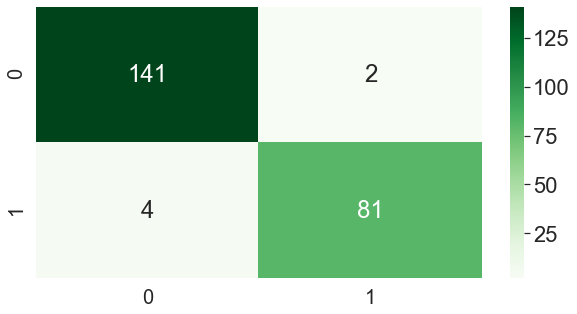

In [45]:
rcParams['figure.figsize'] = 10,5
sns.heatmap(confusion_matrix(val_y_sr,predict), annot=True,cmap='Greens',fmt='g')
plt.tick_params(labelsize=20)
sns.set(font_scale=2)

- Từ đó ta có được ma trận và kết quả này sẽ được sử dụng để tính toán cho các thông số metric của mô hình để đưa ra kết luận chĩnh xác hơn:
  + TP(True positive):  141 lần dự đoán đúng bệnh nhân giai đoạn B
  + TN(True negative):  81  lần dự đoán đúng bệnh nhân giai đoạn M
  + FP(False positive): 4  lần dự đoán sai bệnh nhân giai đoạn B
  + FP(False negative): 2  lần dự đoán sai bệnh nhân giai đoạn M

#### Một vài thông số metrics của mô hình

In [49]:
print("Các thông số metrics của mô hình\n")
accuracy=np.sum(np.equal(val_y_sr, predict)*100 / len(val_y_sr))
print("accuracy=",accuracy,"\n")
print(classification_report(val_y_sr, predict))

Các thông số metrics của mô hình

accuracy= 97.36842105263156 

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       143
           M       0.98      0.95      0.96        85

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



#### Những thông số metrics giúp để đánh giá mô hình có tốt hay không:
- Accuracy: độ chính xác mô hình trên tổng thể toàn bộ tập dữ liệu test, với độ chính xác hơn 97% thì có thể nói đây là một mô hình tốt, tuy nhiên để hiểu rõ hơn mô hình đã dự đoán tốt ở chỗ nào hay còn điểm nào chưa tốt thì ta tiếp tục với các thông số bên dưới.
- Precision: được định nghĩa là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive, precision= TP/(TP+FP).
  + Ở đây ta có thể thấy tỉ lệ dự đoán đúng bệnh nhân đang ở giai đoạn đầu của bệnh ung thư là 97%.
  + Tỉ lệ dự đoán đúng của bệnh nhân đang ở giai đoạn mãn tính là 98%.
  + Hai con số này không có quá nhiều sự chênh lệch và đều rất cao chứng tỏ độ chính xác của các điểm tìm được là rất cao
- Recall: được sử dụng để đo phần nhỏ các mẫu tích cực được phân loại chính xác. Đối với lớp phủ định thì nó được gọi là tính đặc hiệu được tính bằng công thức recall= TP/(TP+FN).
  + Kết quả recall của chẩn đoán ung thư giai đoạn đầu là 0.99.
  + Kết quả recall của chẩn đoán ung thư giai đoạn mãn tính là 0.95.
  + Nhìn sơ qua thì hai kết quả này đều rất cao tuy nhiên nó có phần hơi lệch quá cho việc chẩn đoán ra bệnh nhân đang ở giai đoạn đầu của bệnh ung thư, đây là một điều không nên có và mô hình nên được chấn chỉnh lại để cho hai tỉ lệ gần cân bằng với nhau hoặc ít nhất tỉ lệ dự đoán ra M nên cao hơn dự đoán B một chút, vì nếu bệnh nhân ở giai đoạn mãn tính mà chẩn đoán ra giai đoạn đầu thì tới lúc phát hiện ra sự thật rất khó để cứu chữa. Nguyễn nhân của việc lệch này có thể do số lượng bệnh nhân ung thư giai đoạn B có số lượng hơn 1.5 lần so với ung thư giai đoạn M.
- F1-score: được tính theo trung bình của precision và recall, ta có hai kết quả không bị quá chênh lệch như ở recall và hai con số cũng gần tiệm cận đến 1 chúng tỏ, bộ phân lớp của mô hình là tốt.

In [42]:
radius_mean=200
radius_se=np.nan
radius_worst=300
texture_mean=5
texture_se=np.nan
texture_worst=np.nan
smoothness_mean=0.05
smoothness_se=1
smoothness_worst=np.nan
concavity_mean=0.1
concavity_se=np.nan
concavity_worst=np.nan
symmetry_mean=0.1
symmetry_se=np.nan
symmetry_worst=np.nan
fractal_dimension_mean=0.04
fractal_dimension_se=np.nan
fractal_dimension_worst=np.nan
test = {
  'radius_mean': radius_mean,
    'texture_mean':texture_mean,
    'smoothness_mean':smoothness_mean, 
    'concavity_mean':concavity_mean,
       'symmetry_mean':symmetry_mean,
    'fractal_dimension_mean':fractal_dimension_mean,
    'radius_se':radius_se,
    'texture_se':texture_se, 
    'smoothness_se':smoothness_se,
    'concavity_se':concavity_se,
       'symmetry_se':symmetry_se, 
    'fractal_dimension_se':fractal_dimension_se,
    'radius_worst':radius_worst,
    'texture_worst':texture_worst,
    'smoothness_worst':smoothness_worst,
    'concavity_worst':concavity_worst,
    'symmetry_worst':symmetry_worst,
       'fractal_dimension_worst':fractal_dimension_worst
}
test=pd.DataFrame(test,index =['1'])
print(test)

   radius_mean  texture_mean  smoothness_mean  concavity_mean  symmetry_mean  \
1          200             5             0.05             0.1            0.1   

   fractal_dimension_mean  radius_se  texture_se  smoothness_se  concavity_se  \
1                    0.04        NaN         NaN              1           NaN   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
1          NaN                   NaN           300            NaN   

   smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
1               NaN              NaN             NaN                      NaN  


In [43]:
count_features=np.count_nonzero(test.iloc[0])
print(count_features)

18


In [44]:
a=full_pipeline.predict(test)
if a=="B":
    print("Ung thư giai đoạn đầu")
else:
    print("Ung thư giai đoạn mãn tính")

Ung thư giai đoạn mãn tính
